In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [308]:
df=pd.read_csv("fraudTrain.csv")

In [309]:
# pd.set_option("display.max_columns",None)

In [310]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196458,1196458,2020-05-15 04:00:57,2260801330657968,fraud_Hermann-Gaylord,misc_pos,10.16,Monique,Fox,F,755 Gardner Heights Apt. 420,...,42.3066,-71.9202,4845.0,Accounting technician,1926-09-14,f5ff0dfd38eb70ff9ebe83e72de0871b,1.368590e+09,42.155680,-72.737454,0.0
1196459,1196459,2020-05-15 04:01:45,38580485618059,"fraud_Streich, Hansen and Veum",gas_transport,63.18,Teresa,Clark,F,1323 Derek Mission,...,48.8856,-103.0098,248.0,Industrial/product designer,1968-05-13,0d50b9d7576c808a7718c3be3f3c6d78,1.368591e+09,48.061915,-102.134429,0.0
1196460,1196460,2020-05-15 04:02:28,4223708906367574214,fraud_Padberg-Welch,grocery_pos,107.27,Adam,Riddle,M,27718 Mason Bypass,...,39.0965,-84.6431,177.0,Exhibition designer,1974-05-30,98e5fc0d94fb337b1a4b88de16a8c459,1.368591e+09,38.776142,-84.590500,0.0
1196461,1196461,2020-05-15 04:02:59,676275912597,"fraud_Herman, Treutel and Dickens",misc_net,101.89,Edward,Hensley,M,24318 Dixon Mills,...,44.8955,-85.4082,2223.0,Chief Financial Officer,1986-01-18,a210f25dcfcbe677084f08ca9ab11e75,1.368591e+09,44.501984,-85.910450,0.0


In [311]:
df.shape

(1196463, 23)

<Axes: xlabel='is_fraud', ylabel='Count'>

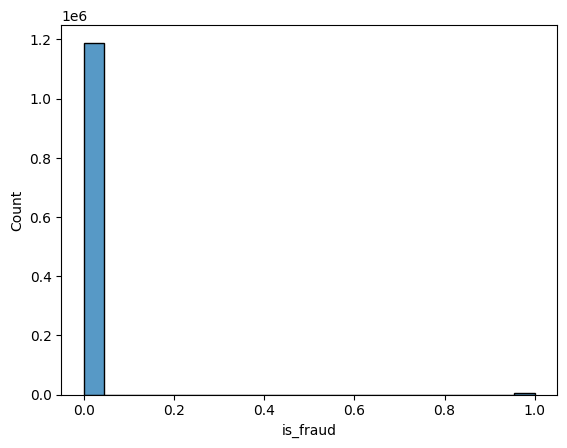

In [312]:
sns.histplot(x="is_fraud",data=df)

In [313]:
df["is_fraud"].value_counts()

,count
is_fraud,
0.0,1189537
1.0,6925


In [314]:
# Fraud transactions (is_fraud == 1)
fraud_df = df[df['is_fraud'] == 1]

# Non-fraud transactions (is_fraud == 0)
non_fraud_df = df[df['is_fraud'] == 0]

# Non-fraud rows ko fraud rows ke barabar random select karna
balanced_non_fraud_df = non_fraud_df.sample(n=len(fraud_df), random_state=42)

# Ab fraud aur balanced non-fraud rows ko concatenate karna
df = pd.concat([fraud_df, balanced_non_fraud_df])





<Axes: xlabel='is_fraud', ylabel='Count'>

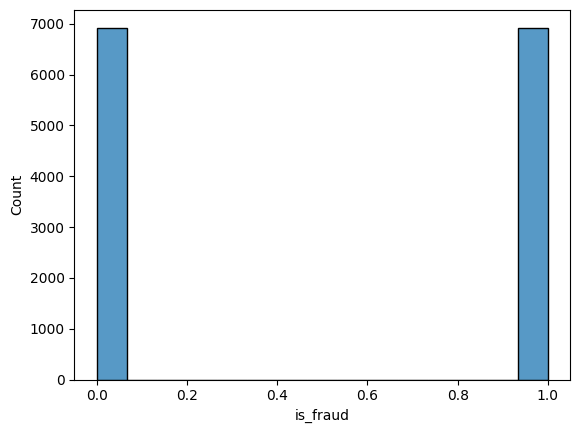

In [315]:
sns.histplot(x="is_fraud",data=df)

In [316]:
df.shape

(13850, 23)

In [317]:
df["is_fraud"].value_counts()

,count
is_fraud,
1.0,6925
0.0,6925


In [318]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.385000e+04,1.385000e+04,13850.000000,13850.000000,13850.000000,13850.000000,1.385000e+04,1.385000e+04,13850.000000,13850.000000,13850.000000
mean,5.876372e+05,3.982390e+17,301.033682,48898.656751,38.549376,-90.246124,9.487169e+04,1.347090e+09,38.548303,-90.239135,0.500000
std,3.596450e+05,1.278019e+18,381.532763,26839.015752,5.143906,13.907344,3.192353e+05,1.230630e+07,5.177611,13.922016,0.500018
min,2.340000e+02,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325387e+09,19.399206,-166.627073,0.000000
25%,2.628185e+05,1.800462e+14,20.570000,27258.000000,34.778900,-96.745600,7.650000e+02,1.336708e+09,34.888968,-96.774451,0.000000
50%,5.974040e+05,3.523843e+15,91.305000,48054.000000,39.390000,-87.410100,2.566000e+03,1.347269e+09,39.389180,-87.369039,0.500000
75%,9.152672e+05,4.635331e+15,471.220000,72011.000000,41.940400,-80.307000,2.163500e+04,1.356819e+09,41.958557,-80.393196,1.000000
max,1.196338e+06,4.992346e+18,8845.930000,99783.000000,66.693300,-67.950300,2.906700e+06,1.368584e+09,67.510267,-66.955996,1.000000


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13850 entries, 2449 to 46229
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             13850 non-null  int64  
 1   trans_date_trans_time  13850 non-null  object 
 2   cc_num                 13850 non-null  int64  
 3   merchant               13850 non-null  object 
 4   category               13850 non-null  object 
 5   amt                    13850 non-null  float64
 6   first                  13850 non-null  object 
 7   last                   13850 non-null  object 
 8   gender                 13850 non-null  object 
 9   street                 13850 non-null  object 
 10  city                   13850 non-null  object 
 11  state                  13850 non-null  object 
 12  zip                    13850 non-null  float64
 13  lat                    13850 non-null  float64
 14  long                   13850 non-null  float64
 15  city

In [320]:
df.isnull().sum()/len(df)*100

,0
Unnamed: 0,0.0
trans_date_trans_time,0.0
cc_num,0.0
merchant,0.0
category,0.0
amt,0.0
first,0.0
last,0.0
gender,0.0
street,0.0


In [321]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885.0,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1.325466e+09,36.430124,-81.179483,1.0
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797.0,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1.325469e+09,29.819364,-99.142791,1.0


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13850 entries, 2449 to 46229
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             13850 non-null  int64  
 1   trans_date_trans_time  13850 non-null  object 
 2   cc_num                 13850 non-null  int64  
 3   merchant               13850 non-null  object 
 4   category               13850 non-null  object 
 5   amt                    13850 non-null  float64
 6   first                  13850 non-null  object 
 7   last                   13850 non-null  object 
 8   gender                 13850 non-null  object 
 9   street                 13850 non-null  object 
 10  city                   13850 non-null  object 
 11  state                  13850 non-null  object 
 12  zip                    13850 non-null  float64
 13  lat                    13850 non-null  float64
 14  long                   13850 non-null  float64
 15  city

In [323]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df['transaction_date'] = df['trans_date_trans_time'].dt.date
df['transaction_time'] = df['trans_date_trans_time'].dt.time


In [324]:
df['year'] = pd.to_datetime(df['transaction_date']).dt.year
df['month'] = pd.to_datetime(df['transaction_date']).dt.month
df['day'] = pd.to_datetime(df['transaction_date']).dt.day

In [325]:
df['hour'] = pd.to_datetime(df['transaction_time'].astype(str)).dt.hour
df['minute'] = pd.to_datetime(df['transaction_time'].astype(str)).dt.minute
df['second'] = pd.to_datetime(df['transaction_time'].astype(str)).dt.second

In [326]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_long,is_fraud,transaction_date,transaction_time,year,month,day,hour,minute,second
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,-81.179483,1.0,2019-01-02,01:06:37,2019,1,2,1,6,37
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,-99.142791,1.0,2019-01-02,01:47:29,2019,1,2,1,47,29
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,-98.836360,1.0,2019-01-02,03:05:23,2019,1,2,3,5,23


In [327]:
# Rename columns
df.rename(columns={

    "cc_num": "credit_card_number",
    "merchant": "merchant_name",
    "category": "merchant_category",
    "amt": "transaction_amount",
    "first": "first_name",
    "last": "last_name",
    "gender": "customer_gender",
    "city": "customer_city",
    "state": "customer_state",
    "zip": "zipcode",
    "lat": "customer_latitude",
    "long": "customer_longitude",
    "city_pop": "city_population",
    "job": "customer_job",
    "trans_num": "transaction_id",
    "unix_time": "transaction_unix_time",
    "merch_lat": "merchant_latitude",
    "merch_long": "merchant_longitude",
    "is_fraud": "fraud_status",
    "transaction_date":"transaction_dates",
    "year": "transaction_year",
    "month": "transaction_month",
    "day": "transaction_date",
    "hour": "transaction_hour",
    "minute": "transaction_minute",
    "second": "transaction_second"
}, inplace=True)

In [328]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,credit_card_number,merchant_name,merchant_category,transaction_amount,first_name,last_name,customer_gender,street,...,merchant_longitude,fraud_status,transaction_dates,transaction_time,transaction_year,transaction_month,transaction_date,transaction_hour,transaction_minute,transaction_second
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,-81.179483,1.0,2019-01-02,01:06:37,2019,1,2,1,6,37
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,-99.142791,1.0,2019-01-02,01:47:29,2019,1,2,1,47,29


In [329]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
credit_card_number,0
merchant_name,0
merchant_category,0
transaction_amount,0
first_name,0
last_name,0
customer_gender,0
street,0


In [330]:
df.drop(columns=["trans_date_trans_time","first_name","last_name","Unnamed: 0","street","transaction_dates","transaction_time"],inplace=True)

In [331]:
df.head(2)

,credit_card_number,merchant_name,merchant_category,transaction_amount,customer_gender,customer_city,customer_state,zipcode,customer_latitude,customer_longitude,...,transaction_unix_time,merchant_latitude,merchant_longitude,fraud_status,transaction_year,transaction_month,transaction_date,transaction_hour,transaction_minute,transaction_second
2449,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,NC,28611.0,35.9946,-81.7266,...,1.325466e+09,36.430124,-81.179483,1.0,2019,1,2,1,6,37
2472,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,San Antonio,TX,78208.0,29.4400,-98.4590,...,1.325469e+09,29.819364,-99.142791,1.0,2019,1,2,1,47,29


In [332]:
import datetime

In [333]:
df['dob'].dtype

dtype('O')

In [334]:


df['dob'] = pd.to_datetime(df['dob'])  # Convert to datetime format


In [335]:


today = datetime.date.today()  # Use datetime.date.today() instead of datetime.today()
df['age'] = df['dob'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))


In [336]:
df["transaction_year"].unique()

array([2019, 2020], dtype=int32)

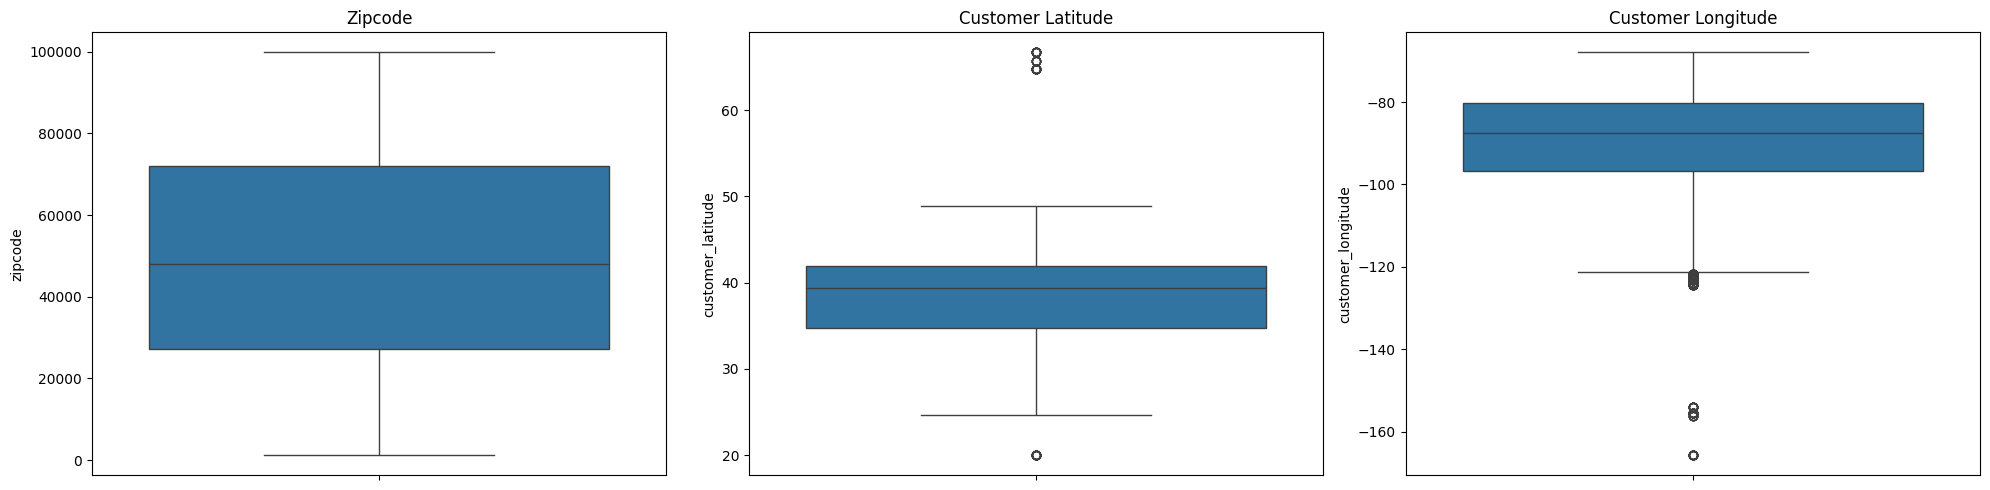

In [337]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(df["zipcode"], ax=axes[0]).set(title="Zipcode")
sns.boxplot(df["customer_latitude"], ax=axes[1]).set(title="Customer Latitude")
sns.boxplot(df["customer_longitude"], ax=axes[2]).set(title="Customer Longitude")


plt.tight_layout()
plt.show()


In [338]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['customer_latitude'].quantile(0.25)
Q3 = df['customer_latitude'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
# Determine the upper bound
upper_bound = Q3 + 1.5 * IQR
lower_bound=Q1-1.5*IQR
# Cap values only above the upper bound
df['customer_latitude'] = df['customer_latitude'].clip(upper=upper_bound,lower=lower_bound)

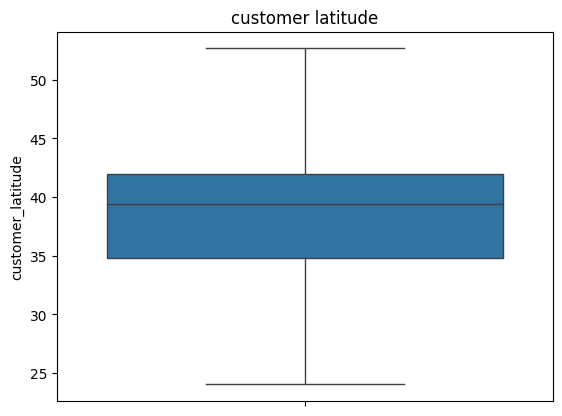

In [339]:
sns.boxplot(df["customer_latitude"])
plt.title("customer latitude")
plt.show()

In [340]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['customer_longitude'].quantile(0.25)
Q3 = df['customer_longitude'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
# Determine the upper bound
upper_bound = Q3 + 1.5 * IQR
lower_bound=Q1-1.5*IQR
# Cap values only above the upper bound
df['customer_longitude'] = df['customer_longitude'].clip(upper=upper_bound,lower=lower_bound)

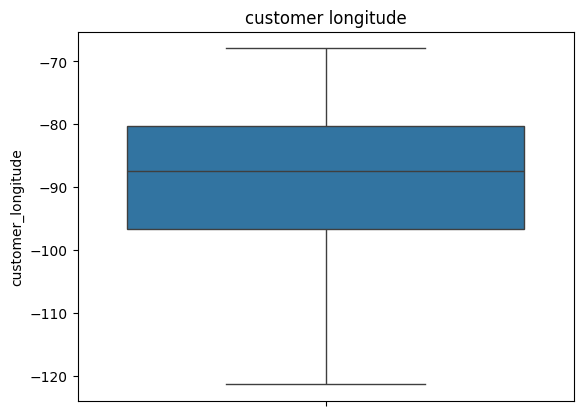

In [341]:
sns.boxplot(df["customer_longitude"])
plt.title("customer longitude")
plt.show()

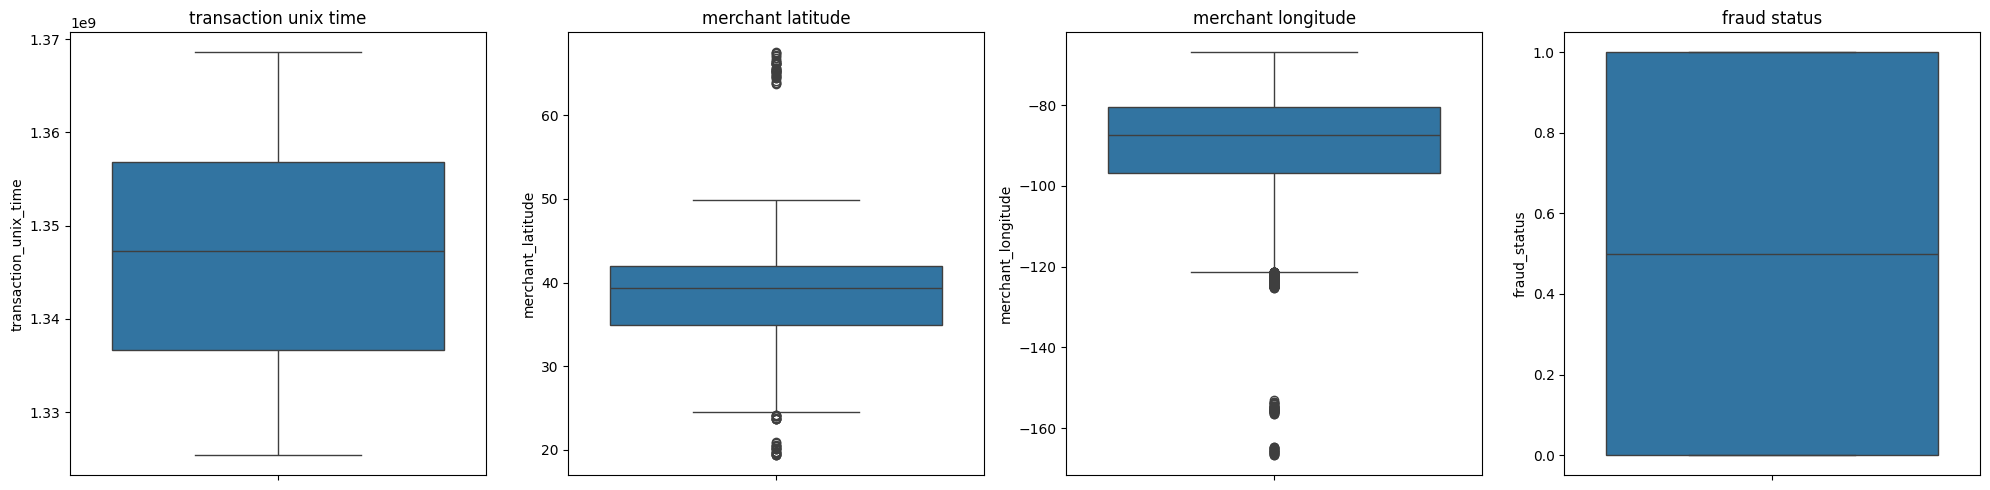

In [342]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.boxplot(df["transaction_unix_time"], ax=axes[0]).set(title="transaction unix time")
sns.boxplot(df["merchant_latitude"], ax=axes[1]).set(title="merchant latitude")
sns.boxplot(df["merchant_longitude"], ax=axes[2]).set(title="merchant longitude")
sns.boxplot(df["fraud_status"], ax=axes[3]).set(title="fraud status")

plt.tight_layout()
plt.show()

In [343]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['merchant_latitude'].quantile(0.25)
Q3 = df['merchant_latitude'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
# Determine the upper bound
upper_bound = Q3 + 1.5 * IQR
lower_bound=Q1-1.5*IQR
# Cap values only above the upper bound
df['merchant_latitude'] = df['merchant_latitude'].clip(upper=upper_bound,lower=lower_bound)

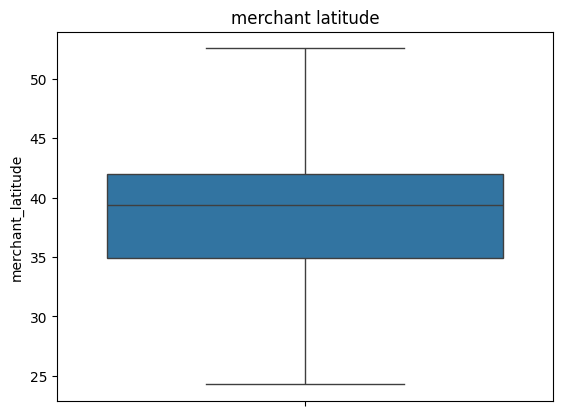

In [344]:
sns.boxplot(df["merchant_latitude"])
plt.title("merchant latitude")
plt.show()

In [345]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['merchant_longitude'].quantile(0.25)
Q3 = df['merchant_longitude'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
# Determine the upper bound
upper_bound = Q3 + 1.5 * IQR
lower_bound=Q1-1.5*IQR
# Cap values only above the upper bound
df['merchant_longitude'] = df['merchant_longitude'].clip(upper=upper_bound,lower=lower_bound)

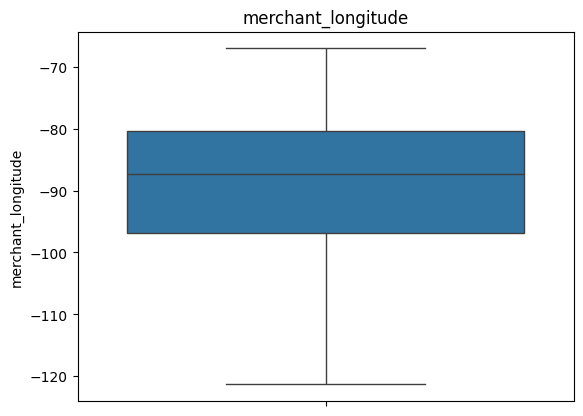

In [346]:
sns.boxplot(df["merchant_longitude"])
plt.title("merchant_longitude")
plt.show()

# Univariant

# Merchant Category Distribution

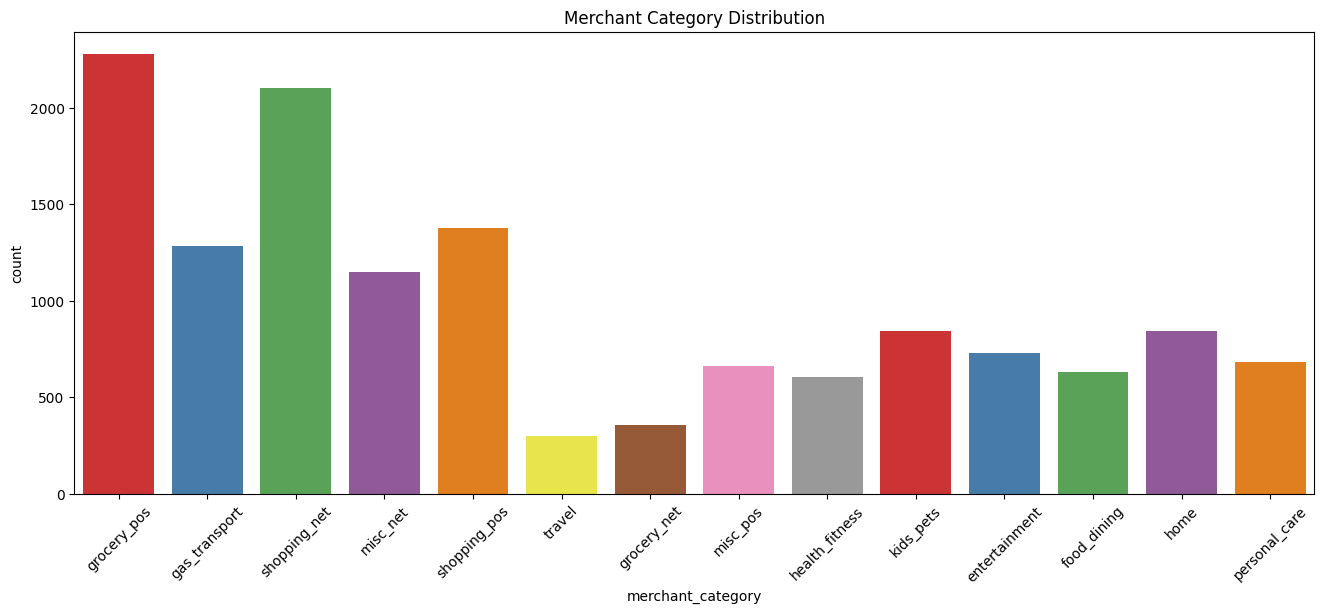

In [347]:
plt.figure(figsize=(16,6))
sns.countplot(x='merchant_category', data=df,palette="Set1")
plt.title("Merchant Category Distribution")
plt.xticks(rotation=45)
plt.show()


# Top 10 Customer Jobs

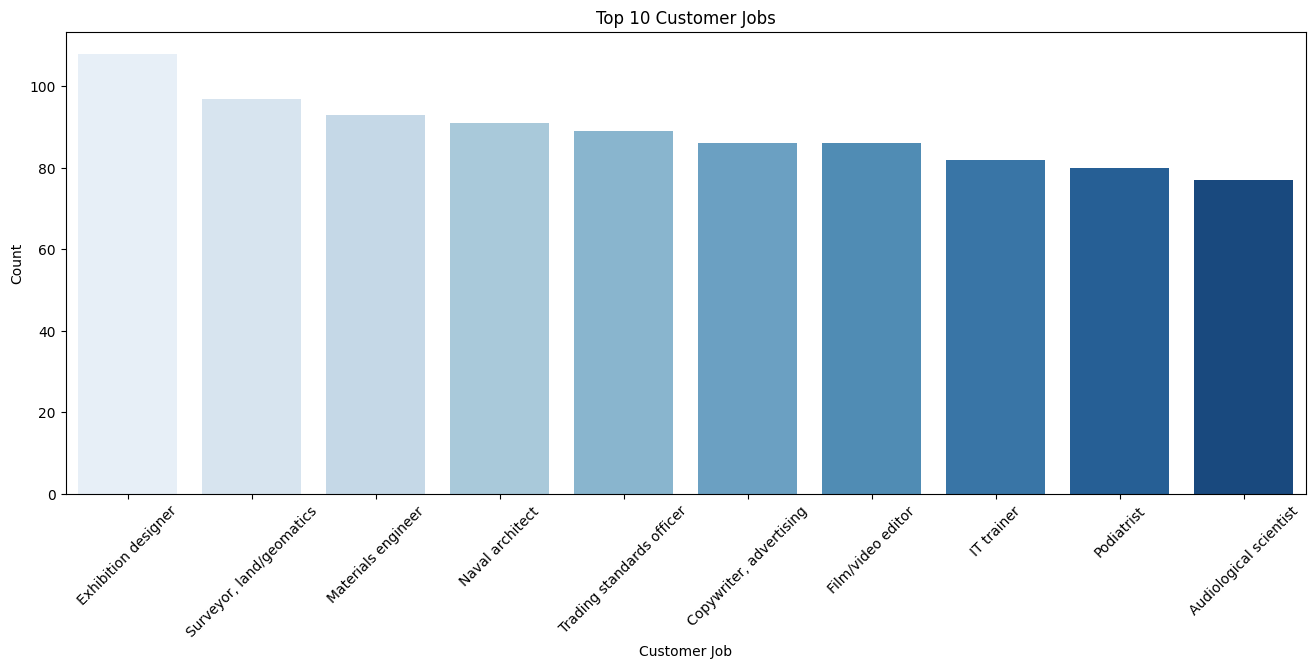

In [348]:
plt.figure(figsize=(16,6))
top_jobs = df['customer_job'].value_counts().nlargest(10)
sns.barplot(x=top_jobs.index, y=top_jobs.values,palette="Blues")
plt.title("Top 10 Customer Jobs")
plt.xticks(rotation=45)
plt.xlabel("Customer Job")
plt.ylabel("Count")
plt.show()


# Customer state Distribution

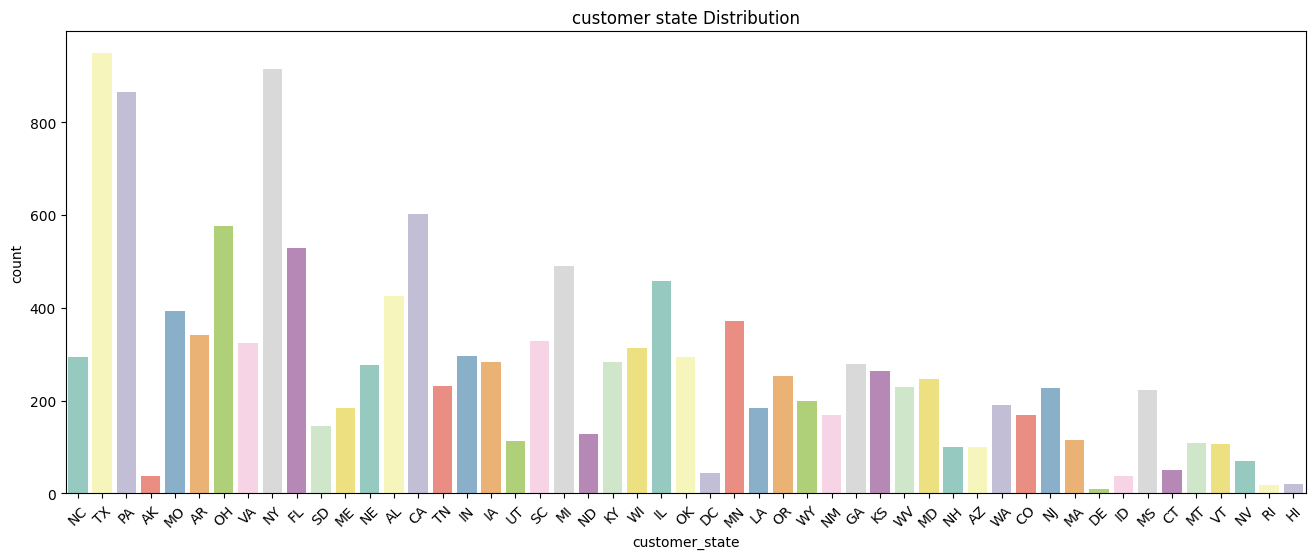

In [349]:
plt.figure(figsize=(16,6))
sns.countplot(x='customer_state', data=df,palette="Set3")
plt.title("customer state Distribution")
plt.xticks(rotation=45)
plt.show()


# Distribution of Transaction Amount

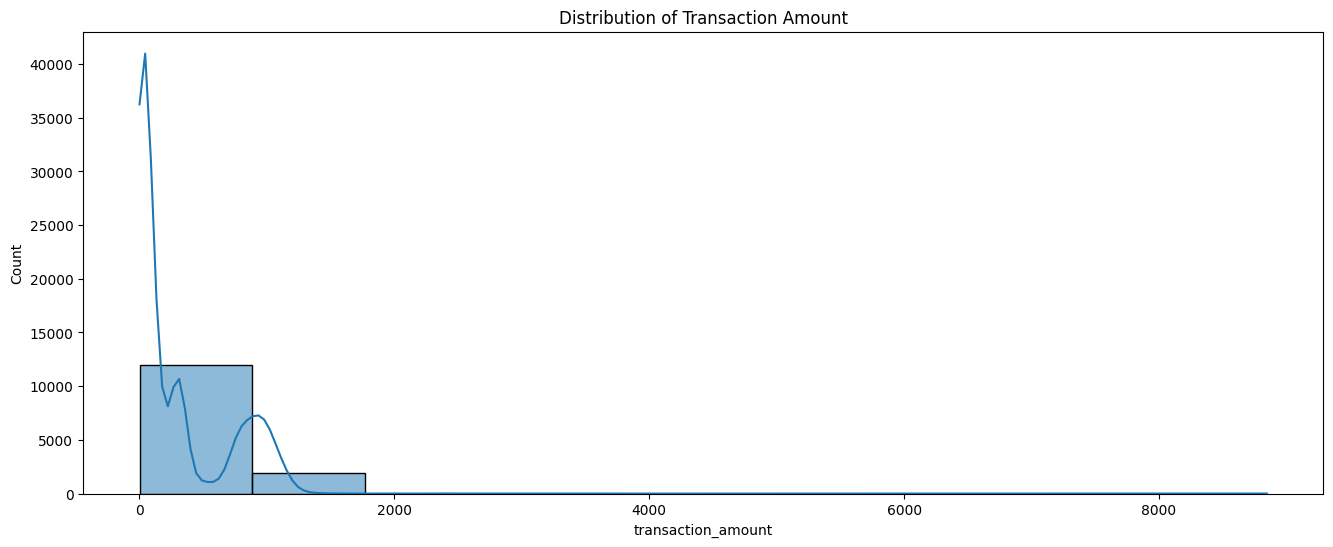

In [350]:
plt.figure(figsize=(16,6))
sns.histplot(df['transaction_amount'], kde=True, bins=10)
plt.title("Distribution of Transaction Amount")
plt.show()


# Gender Distribution

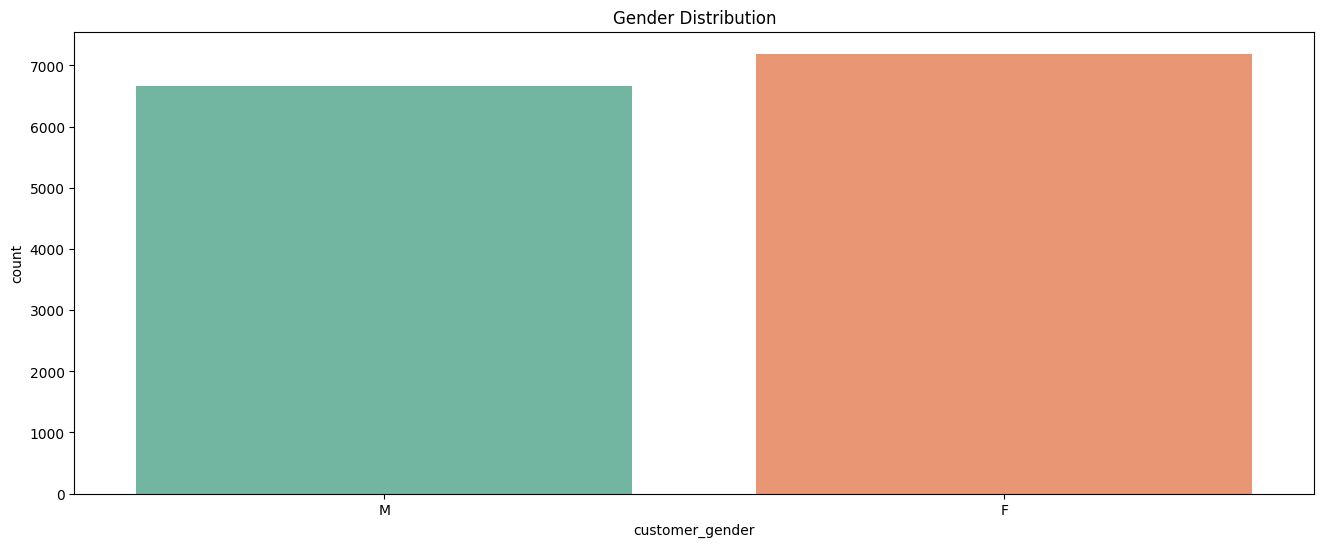

In [351]:
plt.figure(figsize=(16,6))
sns.countplot(x='customer_gender', data=df,palette="Set2")
plt.title("Gender Distribution")
plt.show()

# Distribution of Fraud vs Non-Fraud Transactions

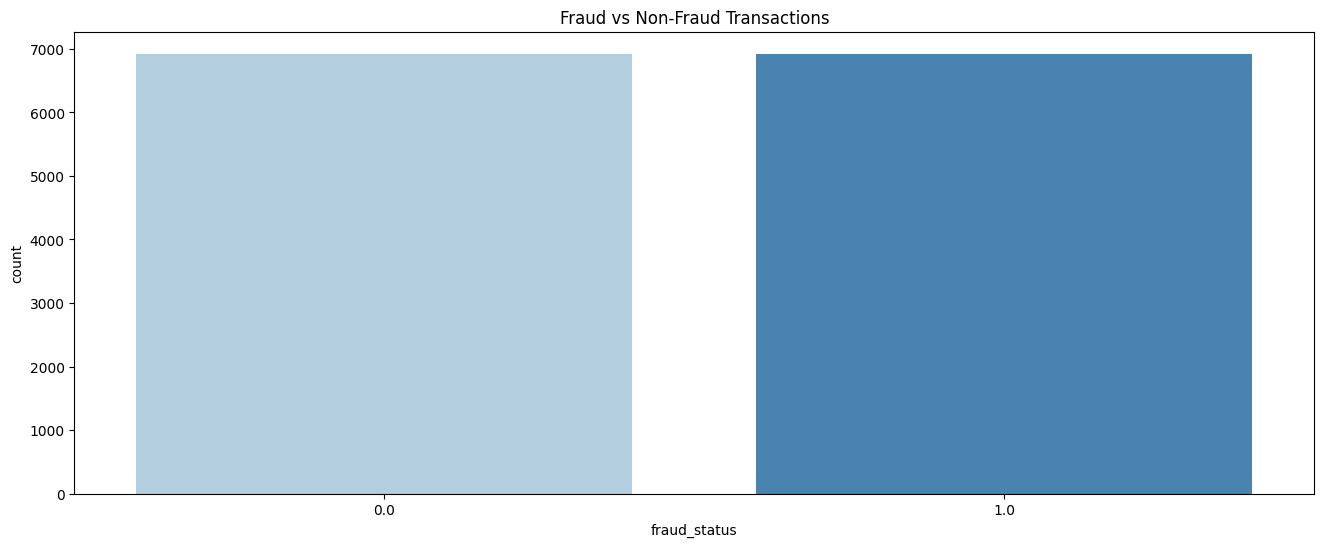

In [352]:
plt.figure(figsize=(16,6))
sns.countplot(x='fraud_status', data=df,palette="Blues")
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

# Transaction Hours Distribution

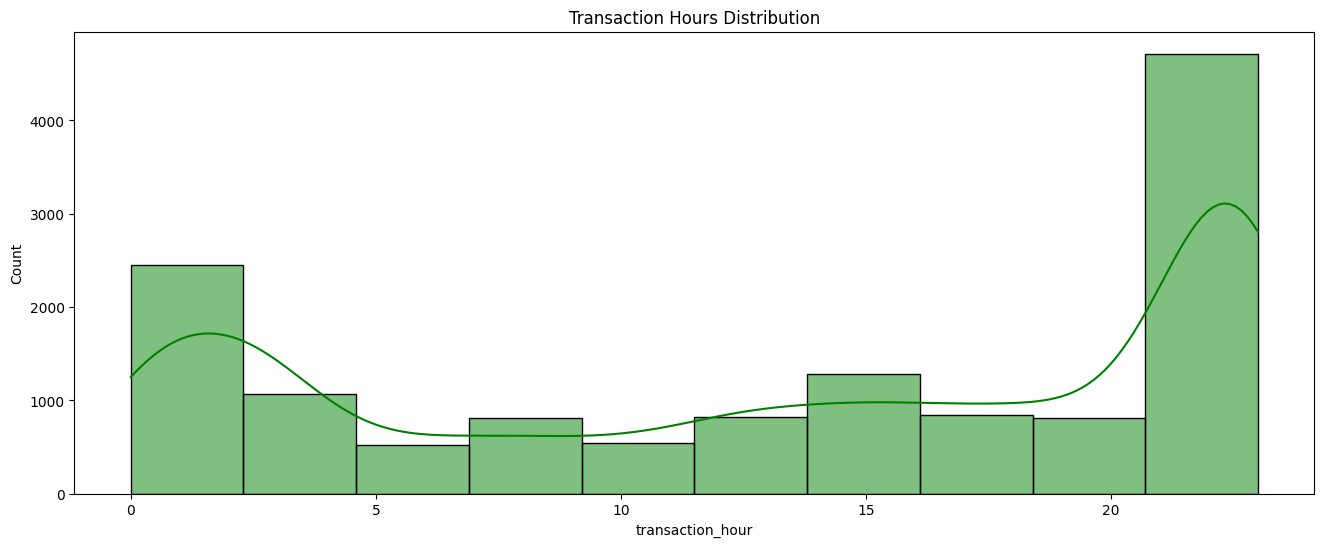

In [353]:
plt.figure(figsize=(16,6))
sns.histplot(df['transaction_hour'], kde=True, bins=10,color="g")
plt.title("Transaction Hours Distribution")
plt.show()

# Bivariant

In [354]:
df.head(2)

,credit_card_number,merchant_name,merchant_category,transaction_amount,customer_gender,customer_city,customer_state,zipcode,customer_latitude,customer_longitude,...,merchant_latitude,merchant_longitude,fraud_status,transaction_year,transaction_month,transaction_date,transaction_hour,transaction_minute,transaction_second,age
2449,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,NC,28611.0,35.9946,-81.7266,...,36.430124,-81.179483,1.0,2019,1,2,1,6,37,36
2472,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,San Antonio,TX,78208.0,29.4400,-98.4590,...,29.819364,-99.142791,1.0,2019,1,2,1,47,29,64


# Top 5 Merchants with Most Fraud Cases

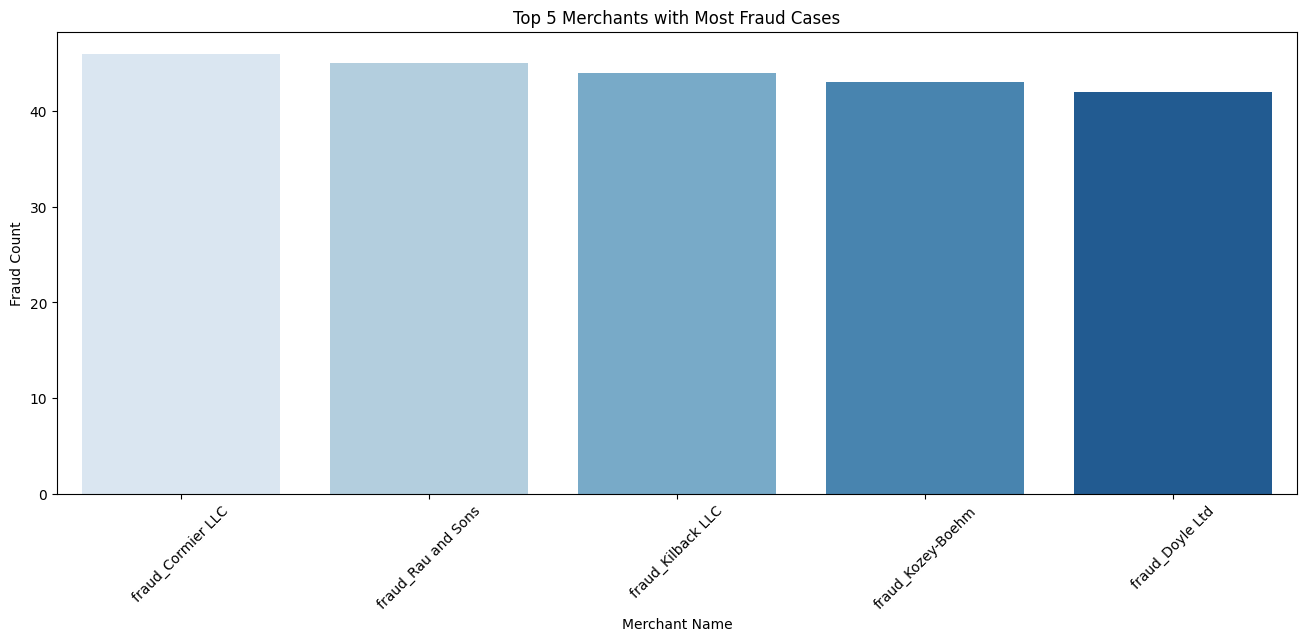

In [355]:
top_merchants = df[df["fraud_status"] == 1]["merchant_name"].value_counts().nlargest(5)

plt.figure(figsize=(16, 6))
sns.barplot(x=top_merchants.index, y=top_merchants.values,palette="Blues")
plt.title("Top 5 Merchants with Most Fraud Cases")
plt.xlabel("Merchant Name")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45)
plt.show()


# Fraud vs Customer Gender

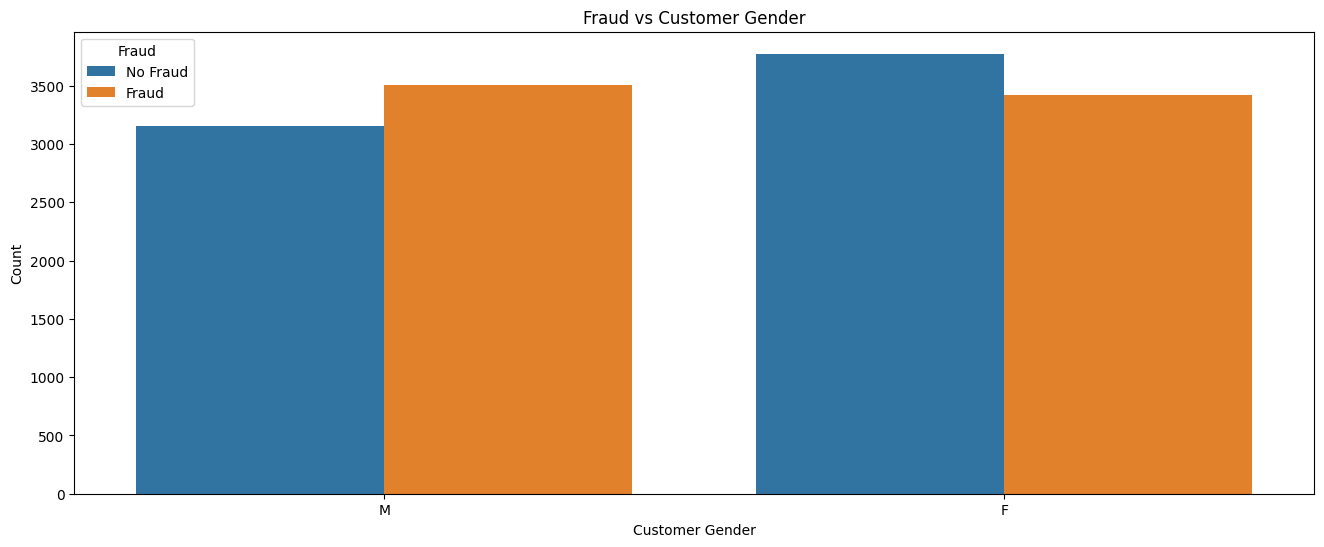

In [356]:
plt.figure(figsize=(16, 6))

# Create a count plot to visualize fraud vs customer gender
sns.countplot(data=df, x='customer_gender', hue='fraud_status')

# Add title and labels
plt.title('Fraud vs Customer Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Count')

# Add legend with proper labels
plt.legend(title='Fraud', labels=['No Fraud', 'Fraud'])

# Show the plot
plt.show()

# Top 10 Customer Jobs Associated with Fraud

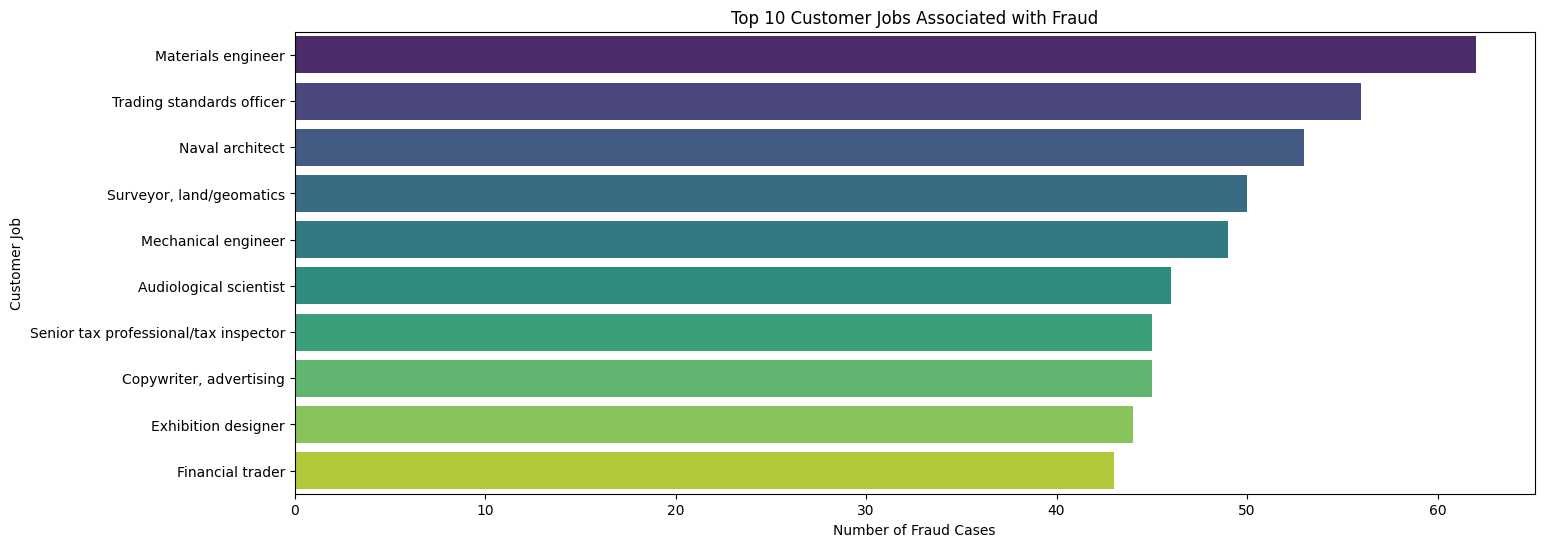

In [357]:
# Filter data for fraud cases (fraud_status = 1)
fraud_data = df[df['fraud_status'] == 1]

# Count the top 10 jobs associated with fraud
top_10_jobs = fraud_data['customer_job'].value_counts().head(10)

# Create a bar plot to visualize the top 10 jobs associated with fraud
plt.figure(figsize=(16, 6))
sns.barplot(x=top_10_jobs.values, y=top_10_jobs.index, palette='viridis')

# Add title and labels
plt.title('Top 10 Customer Jobs Associated with Fraud')
plt.xlabel('Number of Fraud Cases')
plt.ylabel('Customer Job')

# Show the plot
plt.show()

# Fraud vs customer state

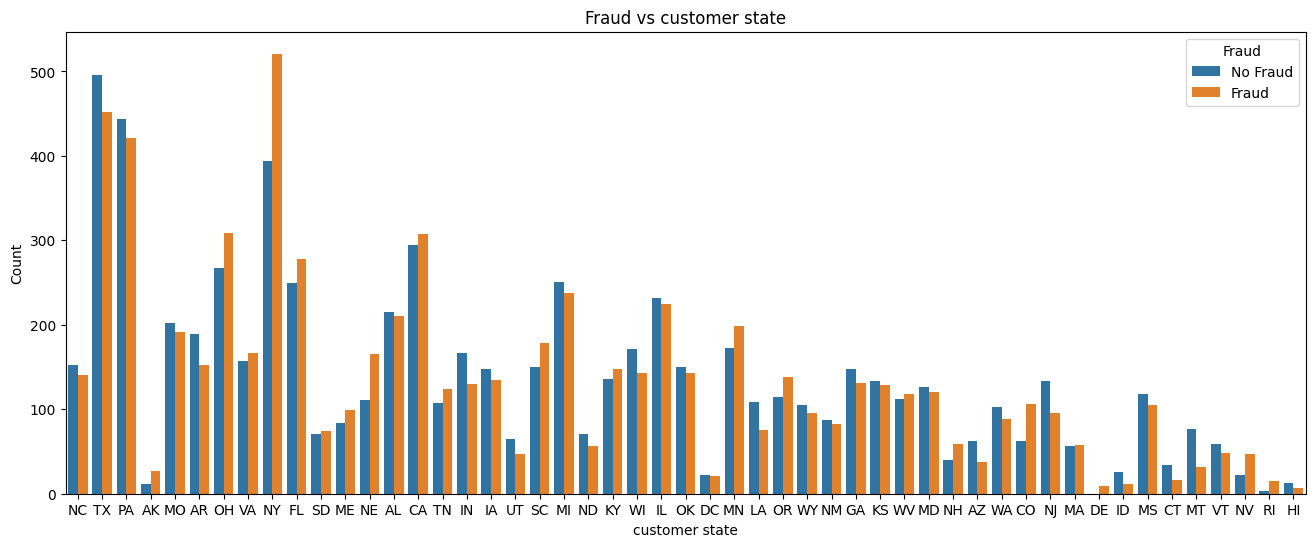

In [358]:
plt.figure(figsize=(16, 6))


sns.countplot(data=df, x='customer_state', hue='fraud_status')

# Add title and labels
plt.title('Fraud vs customer state')
plt.xlabel('customer state')
plt.ylabel('Count')

# Add legend with proper labels
plt.legend(title='Fraud', labels=['No Fraud', 'Fraud'])

# Show the plot
plt.show()

# Top 10 Cities with Highest Fraud Cases

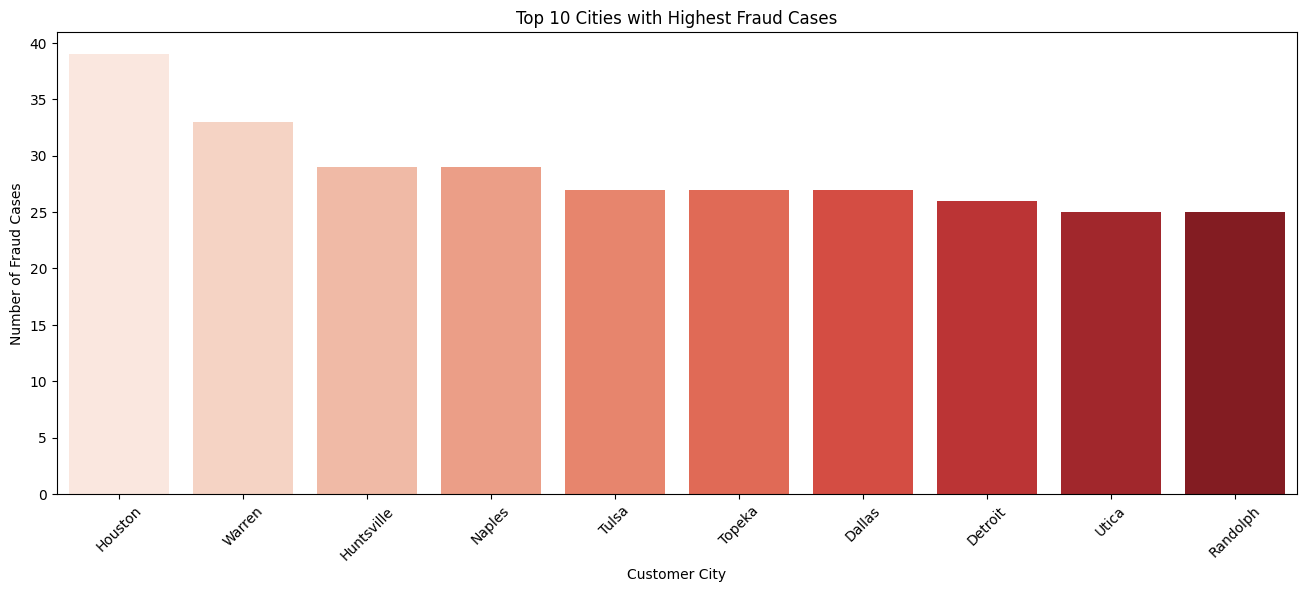

In [359]:

# Assuming df is your DataFrame
# Filter only fraud cases (assuming 'fraud_status' column has 1 for fraud and 0 for no fraud)
fraud_df = df[df['fraud_status'] == 1]

# Count fraud cases per city
top_cities = fraud_df['customer_city'].value_counts().head(10)

# Get top 10 customers with highest fraud transaction amounts
top_customers = fraud_df.nlargest(10, 'transaction_amount')[['customer_city', 'transaction_amount']]

# Plot the top 10 cities with the highest fraud cases
plt.figure(figsize=(16, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='Reds')

# Add title and labels
plt.title('Top 10 Cities with Highest Fraud Cases')
plt.xlabel('Customer City')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Fraud by Month

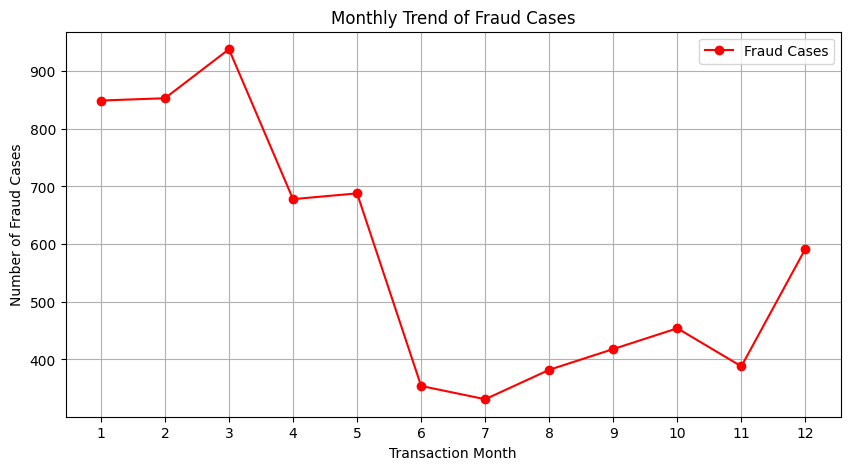

In [360]:
fraud_trend = df[df["fraud_status"] == 1].groupby("transaction_month").size()

# Plot the trend
plt.figure(figsize=(10, 5))
plt.plot(fraud_trend.index, fraud_trend.values, marker='o', linestyle='-', color='red', label="Fraud Cases")

# Customize the plot
plt.xlabel("Transaction Month")
plt.ylabel("Number of Fraud Cases")
plt.title("Monthly Trend of Fraud Cases")
plt.xticks(range(1, 13))  # Ensure months are displayed correctly
plt.legend()
plt.grid(True)

# Multivariant

# Fraud Cases by City, Gender, and Transaction Amount

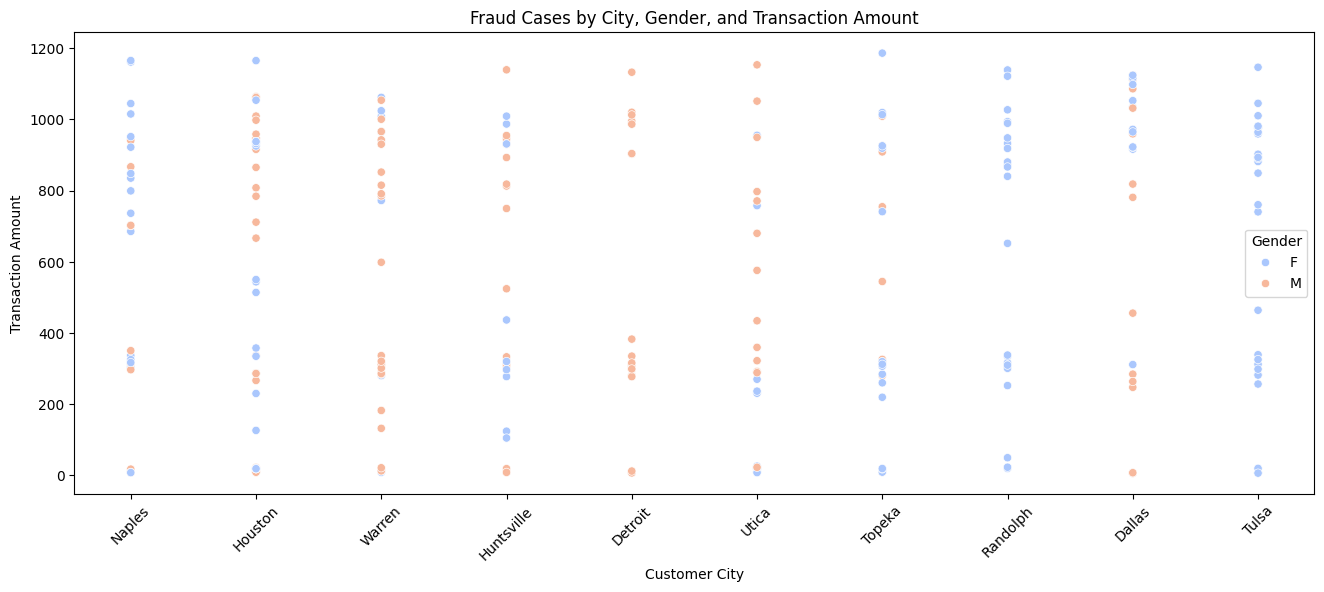

Top 10 Customers with Highest Fraud Transaction Amounts:
        customer_city customer_state  transaction_amount customer_gender
514148          Tekoa             WA             1371.81               M
30239   Edisto Island             SC             1334.07               F
821435     Karns City             PA             1313.18               F
872879   Oconto Falls             WI             1294.83               M
75418         Hovland             MN             1292.21               M
531246         Dayton             OH             1289.89               F
878175     North East             PA             1289.07               F
324775      De Lancey             NY             1288.29               M
64584     New Memphis             IL             1286.27               F
573838        Monitor             WA             1281.51               F


In [361]:

# Assuming df is your DataFrame
# Filter only fraud cases (assuming 'fraud_status' column has 1 for fraud and 0 for no fraud)
fraud_df = df[df['fraud_status'] == 1]

# Count fraud cases per city
top_cities = fraud_df['customer_city'].value_counts().head(10)

# Get top 10 customers with highest fraud transaction amounts
top_customers = fraud_df.nlargest(10, 'transaction_amount')[['customer_city', 'customer_state', 'transaction_amount', 'customer_gender']]

# Plot fraud cases by city, gender, and transaction amount
plt.figure(figsize=(16, 6))
sns.scatterplot(data=fraud_df[fraud_df['customer_city'].isin(top_cities.index)],
                x='customer_city',
                y='transaction_amount',
                hue='customer_gender',

                palette='coolwarm',
                sizes=(20, 200))

# Add title and labels
plt.title('Fraud Cases by City, Gender, and Transaction Amount')
plt.xlabel('Customer City')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Show the plot
plt.show()

# Display top 10 customers with highest fraud amounts
print("Top 10 Customers with Highest Fraud Transaction Amounts:")
print(top_customers)


# Top 10 Fraud Status Counts by Merchant Name and Category

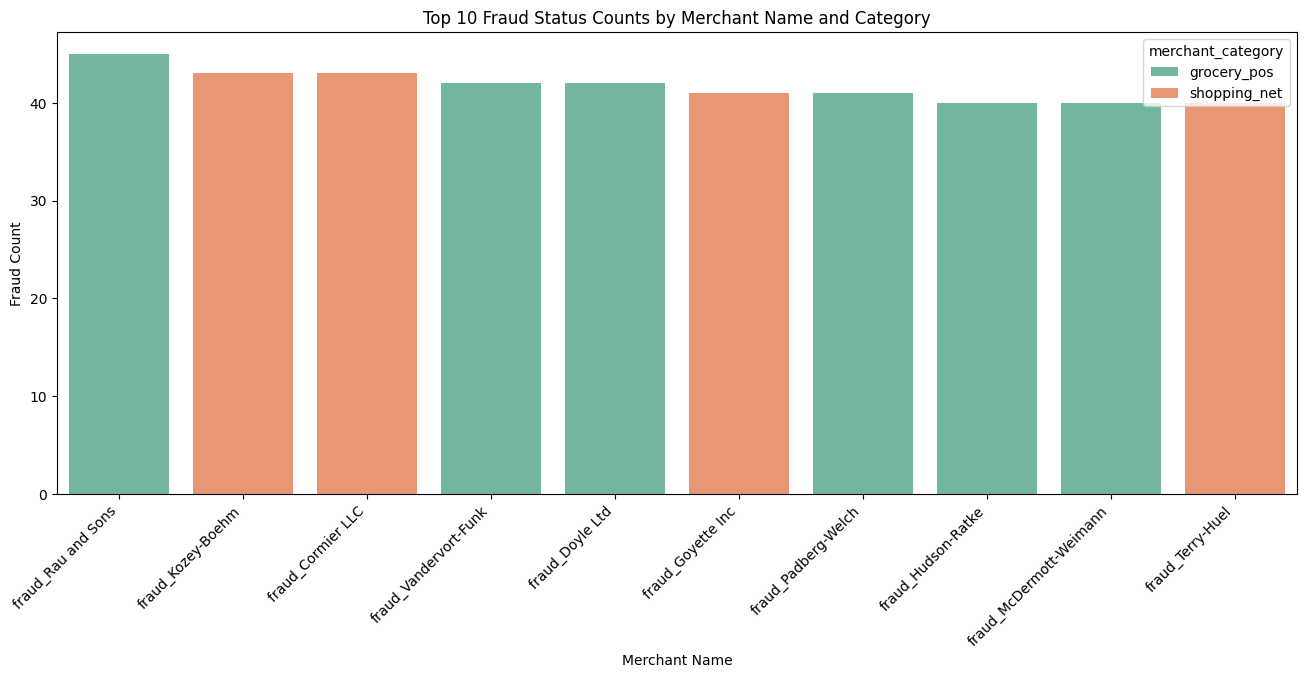

In [362]:
# Grouping by merchant name, category, and fraud status
fraud_counts = df.groupby(['merchant_name', 'merchant_category', 'fraud_status']).size().reset_index(name='count')

# Selecting top 10 merchants with highest fraud count
top_merchants = fraud_counts.sort_values(by='count', ascending=False).head(10)

# Create the plot
plt.figure(figsize=(16, 6))
sns.barplot(data=top_merchants, x='merchant_name', y='count', hue='merchant_category', palette="Set2")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.title('Top 10 Fraud Status Counts by Merchant Name and Category')
plt.xlabel('Merchant Name')
plt.ylabel('Fraud Count')

# Show the plot
plt.show()


# Top 10 Fraud Status Counts by Customer City and State

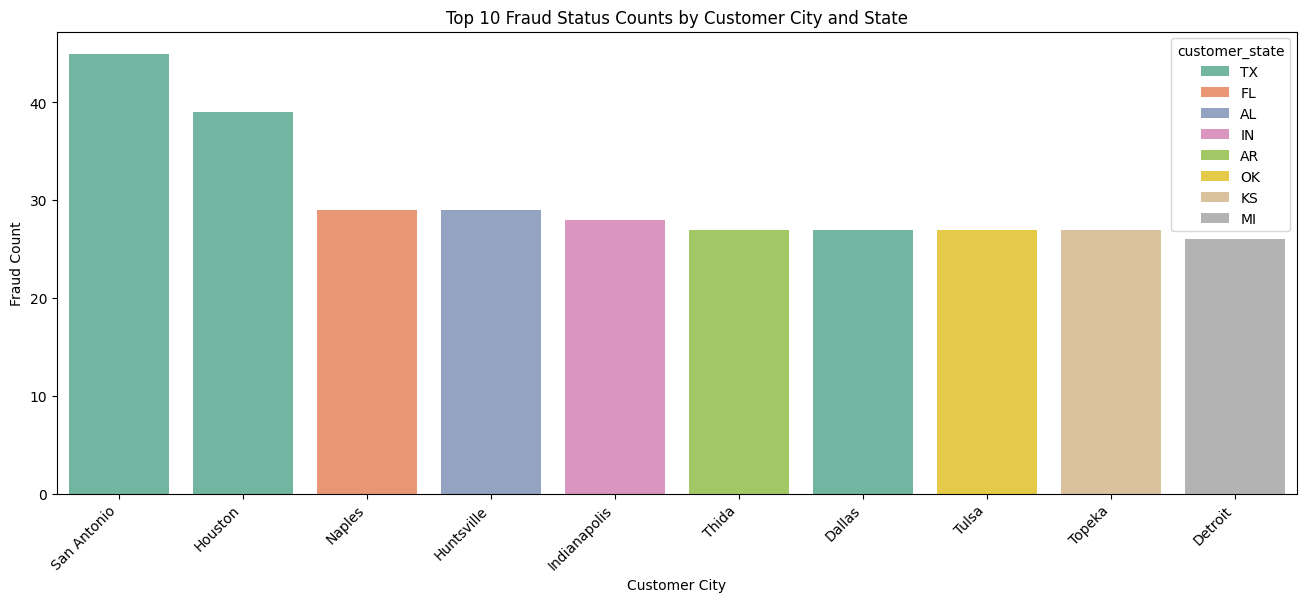

In [363]:
# Grouping by customer city, state, and fraud status
fraud_counts = df.groupby(['customer_city', 'customer_state', 'fraud_status']).size().reset_index(name='count')

# Selecting top 10 locations with highest fraud count
top_locations = fraud_counts.sort_values(by='count', ascending=False).head(10)

# Create the plot
plt.figure(figsize=(16, 6))
sns.barplot(data=top_locations, x='customer_city', y='count', hue='customer_state', palette="Set2")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.title('Top 10 Fraud Status Counts by Customer City and State')
plt.xlabel('Customer City')
plt.ylabel('Fraud Count')

# Show the plot
plt.show()


# Fraud Status Distribution by Customer State and Gender

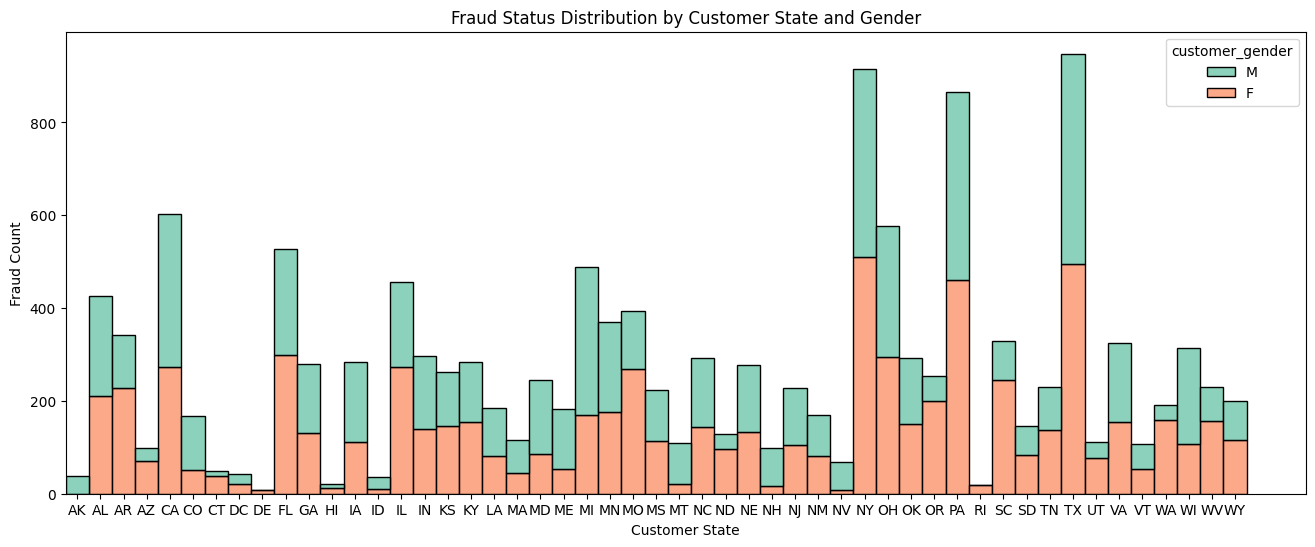

In [364]:
# Grouping by customer state, gender, and fraud status
fraud_counts = df.groupby(['customer_state', 'customer_gender', 'fraud_status']).size().reset_index(name='count')

# Create a different type of plot (e.g., stacked bar chart)
plt.figure(figsize=(16, 6))
sns.histplot(data=fraud_counts, x='customer_state', weights='count', hue='customer_gender',  multiple='stack', palette="Set2")

# Adjust x-axis limits to start slightly away from zero and extend to the last bin
plt.xlim(left=-0.5)

# Set labels and title
plt.title('Fraud Status Distribution by Customer State and Gender')
plt.xlabel('Customer State')
plt.ylabel('Fraud Count')

# Show the plot
plt.show()


# Fraud Status Distribution by Top 10 Customer Cities and Gender

Text(0, 0.5, 'Fraud Count')

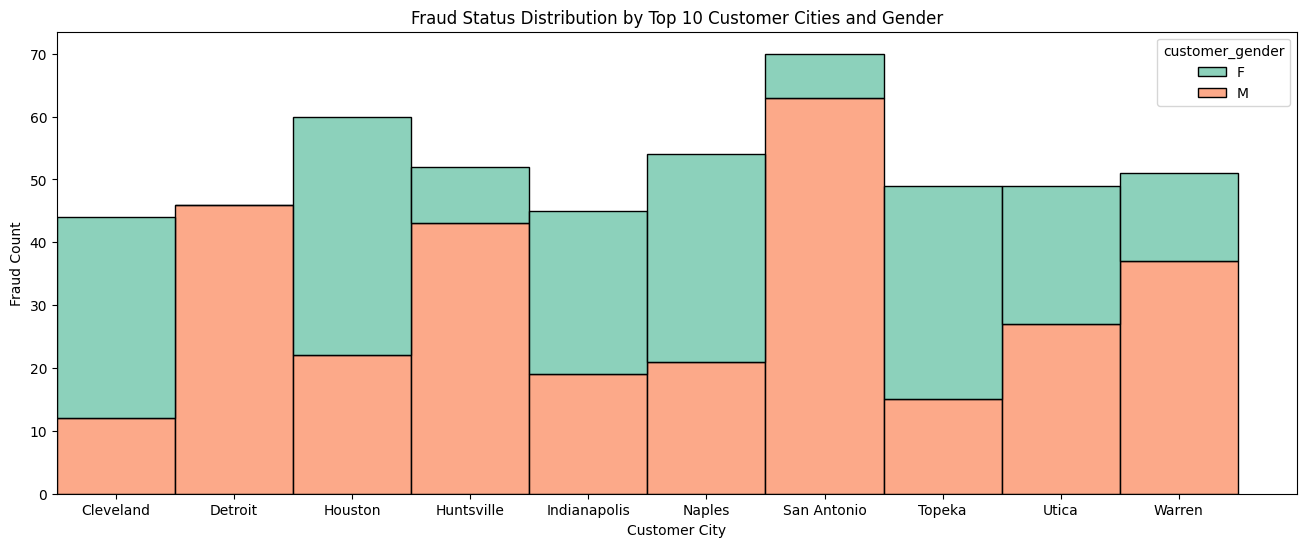

In [365]:
# Grouping by customer city, gender, and fraud status
fraud_counts = df.groupby(['customer_city', 'customer_gender', 'fraud_status']).size().reset_index(name='count')

# Calculate the total fraud count for each city
city_fraud_total = fraud_counts.groupby('customer_city')['count'].sum().reset_index()

# Sort and keep the top 10 cities based on total fraud count
top_cities = city_fraud_total.sort_values(by='count', ascending=False).head(10)['customer_city']

# Filter fraud_counts to only include the top 10 cities
fraud_counts_top_cities = fraud_counts[fraud_counts['customer_city'].isin(top_cities)]

# Create a stacked bar chart
plt.figure(figsize=(16, 6))
sns.histplot(data=fraud_counts_top_cities, x='customer_city', weights='count', hue='customer_gender', multiple='stack', palette="Set2")

# Adjust x-axis limits to start slightly away from zero and extend to the last bin
plt.xlim(left=-0.5)

# Set labels and title
plt.title('Fraud Status Distribution by Top 10 Customer Cities and Gender')
plt.xlabel('Customer City')
plt.ylabel('Fraud Count')


#  Fraud Trend during transaction

In [368]:
import plotly.express as px
# Plotting the map with fraud status
fig = px.scatter_geo(df,
                     lat='customer_latitude',  # Latitude column
                     lon='customer_longitude', # Longitude column
                     color='fraud_status',     # Fraud status for coloring the points
                     hover_name='customer_city', # Display city on hover
                     hover_data=['customer_state', 'fraud_status', 'transaction_amount'],  # Display more details on hover
                     title='Customer Fraud Status Map',
                     projection='natural earth',  # Use natural earth projection
                     color_continuous_scale='Viridis'  # Choose color scale
)

# Change background color
fig.update_layout(
    paper_bgcolor='lightblue',  # Background color of the entire figure (behind the map)
    plot_bgcolor='lightgray',   # Background color of the plot area (map itself)
)

# Show the map
fig.show()


In [369]:
# Group by Merchant Latitude, Merchant Longitude, and Fraud Status to get fraud count
fraud_counts = df.groupby(['merchant_name', 'merchant_category', 'merchant_latitude', 'merchant_longitude', 'fraud_status']).size().reset_index(name='count')

# Create a map using merchant latitude and longitude
fig = px.scatter_geo(fraud_counts,
                     lat='merchant_latitude',       # Merchant Latitude
                     lon='merchant_longitude',      # Merchant Longitude
                     color='fraud_status',          # Color by fraud status
                     size='count',                  # Size by fraud count
                     hover_name='merchant_name',    # Hover to display merchant name
                     hover_data=['merchant_category', 'count'], # Show more details on hover
                     title='Fraud Status by Merchant Location (Latitude, Longitude)',
                     labels={'merchant_name': 'Merchant Name',
                             'merchant_category': 'Merchant Category',
                             'count': 'Fraud Count'},
                     color_continuous_scale='Viridis', # Color scale for fraud status
                     projection='natural earth'  # Map projection type
)

# Change the background color
fig.update_layout(
    paper_bgcolor='lightblue',  # Background color of the entire figure (behind the map)
    plot_bgcolor='lightgray',   # Background color of the plot area (map itself)
)

# Show the map
fig.show()


In [242]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=["merchant_name","merchant_category","merchant_category","customer_city","customer_state","customer_job","transaction_id","customer_gender"]
for i in col:
  df[i]=le.fit_transform(df[i])

In [243]:
df.head()

,credit_card_number,merchant_name,merchant_category,transaction_amount,customer_gender,customer_city,customer_state,zipcode,customer_latitude,customer_longitude,...,merchant_latitude,merchant_longitude,fraud_status,transaction_year,transaction_month,transaction_date,transaction_hour,transaction_minute,transaction_second,age
2449,4613314721966,541,4,281.06,1,148,27,28611.0,35.9946,-81.7266,...,36.430124,-81.179483,1.0,2019,1,2,1,6,37,36
2472,340187018810220,285,2,11.52,0,666,43,78208.0,29.4400,-98.4590,...,29.819364,-99.142791,1.0,2019,1,2,1,47,29,64
2523,340187018810220,196,4,276.31,0,666,43,78208.0,29.4400,-98.4590,...,29.273085,-98.836360,1.0,2019,1,2,3,5,23,64
2546,4613314721966,162,2,7.03,1,148,27,28611.0,35.9946,-81.7266,...,35.909292,-82.091010,1.0,2019,1,2,3,38,3,36
2553,340187018810220,328,4,275.73,0,666,43,78208.0,29.4400,-98.4590,...,29.786426,-98.683410,1.0,2019,1,2,3,55,47,64


In [244]:
df.drop(columns={'credit_card_number','transaction_unix_time','transaction_id','transaction_second','customer_latitude','customer_longitude','merchant_latitude','merchant_longitude','city_population','dob'},inplace=True)

In [245]:
df.head()

,merchant_name,merchant_category,transaction_amount,customer_gender,customer_city,customer_state,zipcode,customer_job,fraud_status,transaction_year,transaction_month,transaction_date,transaction_hour,transaction_minute,age
2449,541,4,281.06,1,148,27,28611.0,409,1.0,2019,1,2,1,6,36
2472,285,2,11.52,0,666,43,78208.0,218,1.0,2019,1,2,1,47,64
2523,196,4,276.31,0,666,43,78208.0,218,1.0,2019,1,2,3,5,64
2546,162,2,7.03,1,148,27,28611.0,409,1.0,2019,1,2,3,38,36
2553,328,4,275.73,0,666,43,78208.0,218,1.0,2019,1,2,3,55,64


In [246]:
df.shape

(7864, 15)

In [247]:
corr=df.corr()

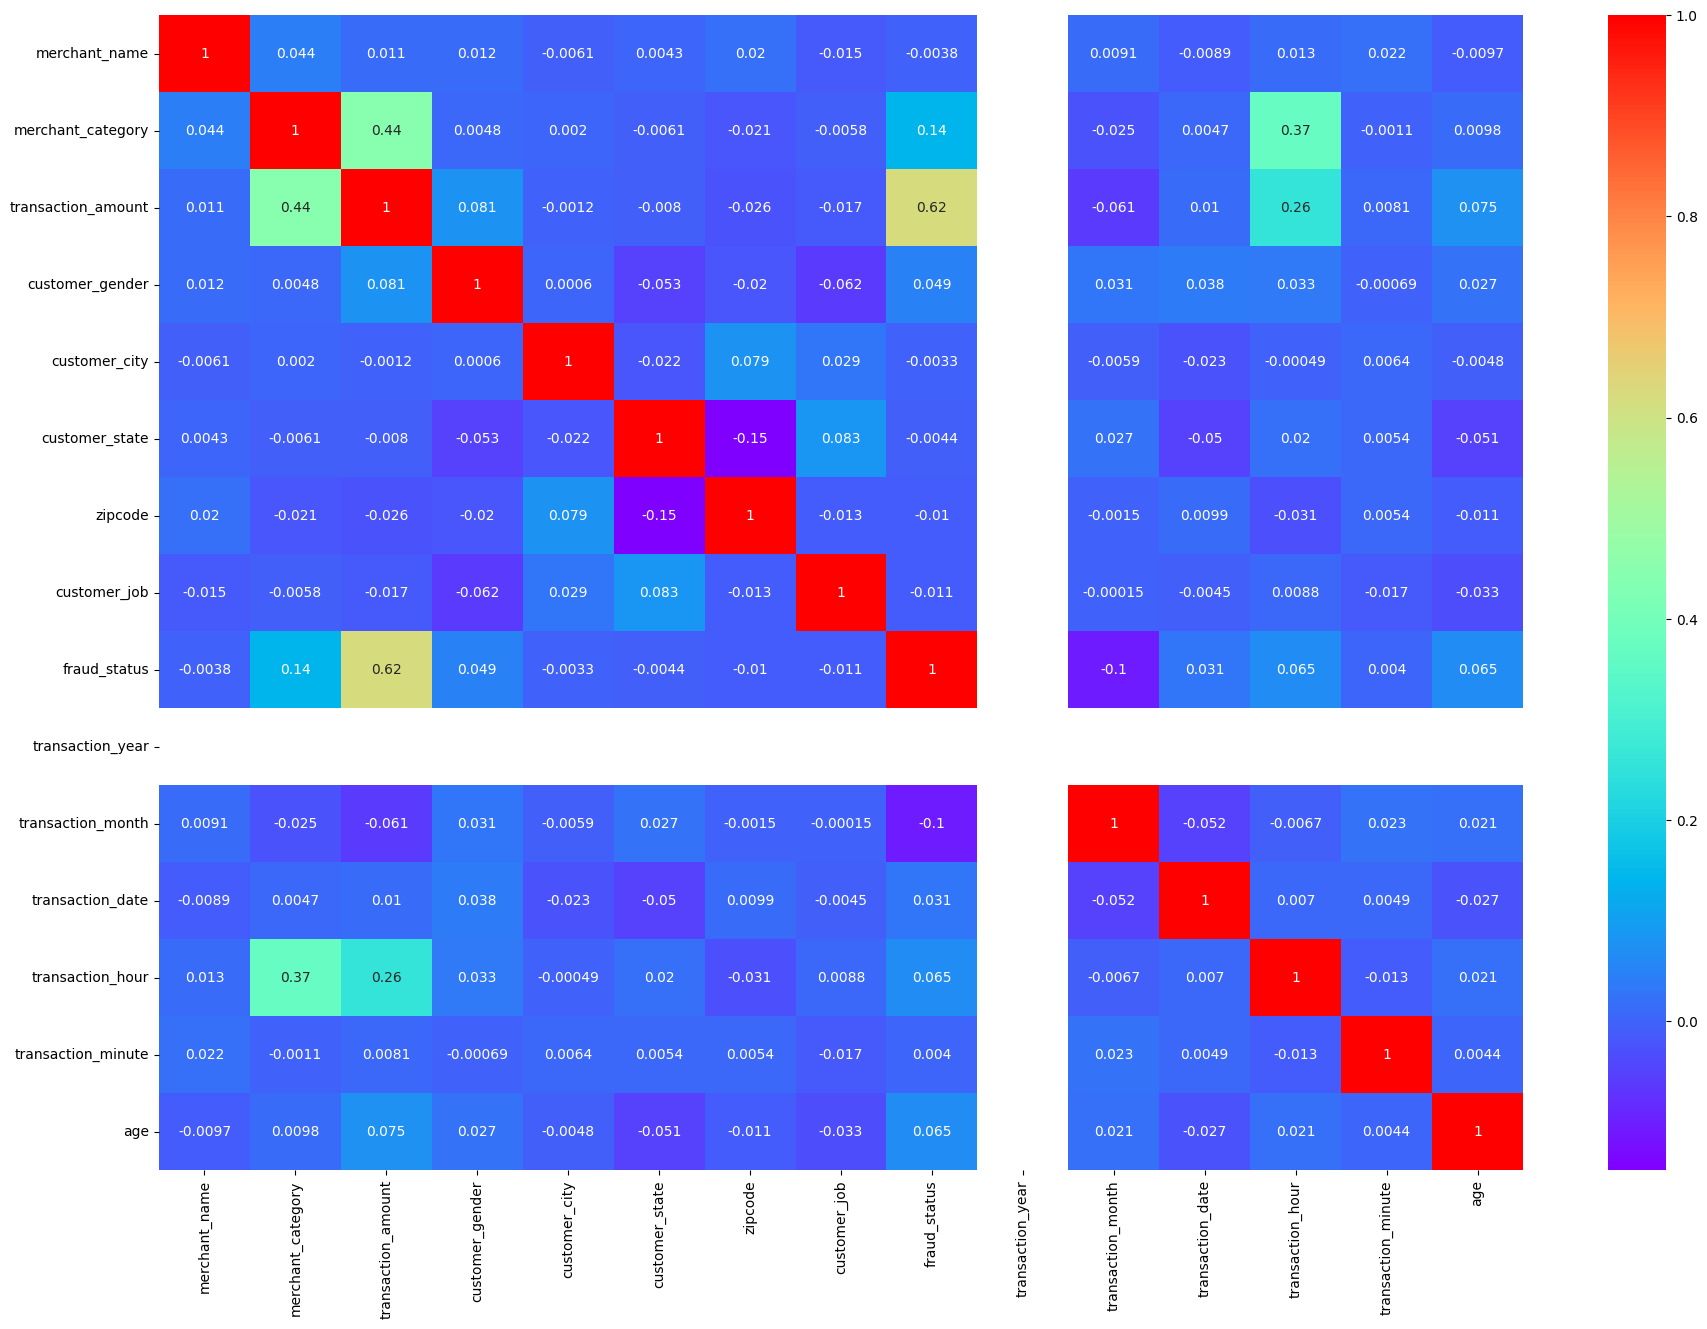

In [248]:
plt.figure(figsize=(22,15))
sns.heatmap(corr,annot=True,cmap="rainbow")
plt.show()

In [249]:
df1=df.copy()

In [250]:
df1

,merchant_name,merchant_category,transaction_amount,customer_gender,customer_city,customer_state,zipcode,customer_job,fraud_status,transaction_year,transaction_month,transaction_date,transaction_hour,transaction_minute,age
2449,541,4,281.06,1,148,27,28611.0,409,1.0,2019,1,2,1,6,36
2472,285,2,11.52,0,666,43,78208.0,218,1.0,2019,1,2,1,47,64
2523,196,4,276.31,0,666,43,78208.0,218,1.0,2019,1,2,3,5,64
2546,162,2,7.03,1,148,27,28611.0,409,1.0,2019,1,2,3,38,36
2553,328,4,275.73,0,666,43,78208.0,218,1.0,2019,1,2,3,55,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386871,527,7,49.97,1,205,5,80436.0,282,0.0,2019,6,26,12,31,46
137790,180,5,94.04,1,318,15,46322.0,91,0.0,2019,3,16,18,29,43
213163,360,2,40.61,0,47,45,22810.0,160,0.0,2019,4,19,2,38,52
211287,534,11,9.27,0,107,9,33909.0,216,0.0,2019,4,18,0,36,57


In [260]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

# Dropping rows with missing values
df1.dropna(inplace=True)

# Selecting features and target variable
selected_features = [
    "merchant_category", "transaction_amount", "customer_gender", "customer_city",
    "customer_state", "zipcode", "customer_job", "fraud_status",
    "transaction_year", "transaction_month", "transaction_date", "transaction_hour", "age"
]


X = df1[selected_features]
y = df1["fraud_status"]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Applying Forward Feature Selection
sfs = SequentialFeatureSelector(model, n_features_to_select="auto", direction="forward")
sfs.fit(X_train, y_train)

# Getting selected features
selected_features = X.columns[sfs.get_support()]
print("Selected Features (Forward Selection):", selected_features)


Selected Features (Forward Selection): Index(['merchant_category', 'transaction_amount', 'customer_gender',
       'customer_city', 'customer_state', 'fraud_status'],
      dtype='object')


# Logistic Regression Classifier

In [269]:

X=df[['merchant_category', 'transaction_amount','customer_job', 'transaction_year','transaction_month','age','customer_city','customer_state']]


In [270]:
y=df[["fraud_status"]]

In [271]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [272]:
#feature Scaling
#column=> mean=>
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)

In [273]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [274]:
#Predicting the test set result
y_predict= classifier.predict(X_test)

In [275]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_predict)
cm

array([[937,  56],
       [259, 714]])

In [276]:
from sklearn.metrics import accuracy_score

LR_accuracy = accuracy_score(y_test, y_predict)
print("Accuracy",LR_accuracy)

Accuracy 0.8397761953204476


# Support Vector Classifier

In [277]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [278]:
#Predicting the test set result
y_predicts= classifier.predict(X_test)

In [279]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_predicts)
cm

array([[940,  53],
       [266, 707]])

In [280]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_predicts))


Accuracy: 0.8377416073245167


# Decision Tree Classifier

In [281]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [282]:

# Make predictions
y__pred = clf.predict(X_test)



In [283]:
# Evaluate the model
Dt_accuracy = accuracy_score(y_test, y__pred)
print("Accuracy:", Dt_accuracy)


Accuracy: 0.9404883011190234


# Random Forest Classifier

In [284]:
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [285]:
#Predicting the test set result
Y_pred= classifier.predict(X_test)

In [286]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, Y_pred)
cm

array([[950,  43],
       [ 67, 906]])

In [287]:
# Evaluate the model
Rf_accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy:", Rf_accuracy)

Accuracy: 0.9440488301119023


# xgboost Model

In [292]:
import xgboost as xgb

In [293]:
# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Train the model
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [294]:
y_pred = xgb_classifier.predict(X_test)


In [295]:
xg_accuracy = accuracy_score(y_test, y_pred)
print("xg_accuracy",xg_accuracy)


xg_accuracy 0.9587995930824008


# Model Evaluation

In [296]:
import pandas as pd

# Assuming accuracy values are already calculated
model_ev = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest Classifier', 'Decision Tree'],
    'Accuracy': [round(LR_accuracy * 100, 2),
                 round(xg_accuracy* 100, 4),
                 round(Rf_accuracy * 100, 2),
                 round(Dt_accuracy * 100, 2)]
})

print(model_ev)


                      Model  Accuracy
0       Logistic Regression     83.98
1                   XGBoost     95.88
2  Random Forest Classifier     94.40
3             Decision Tree     94.05


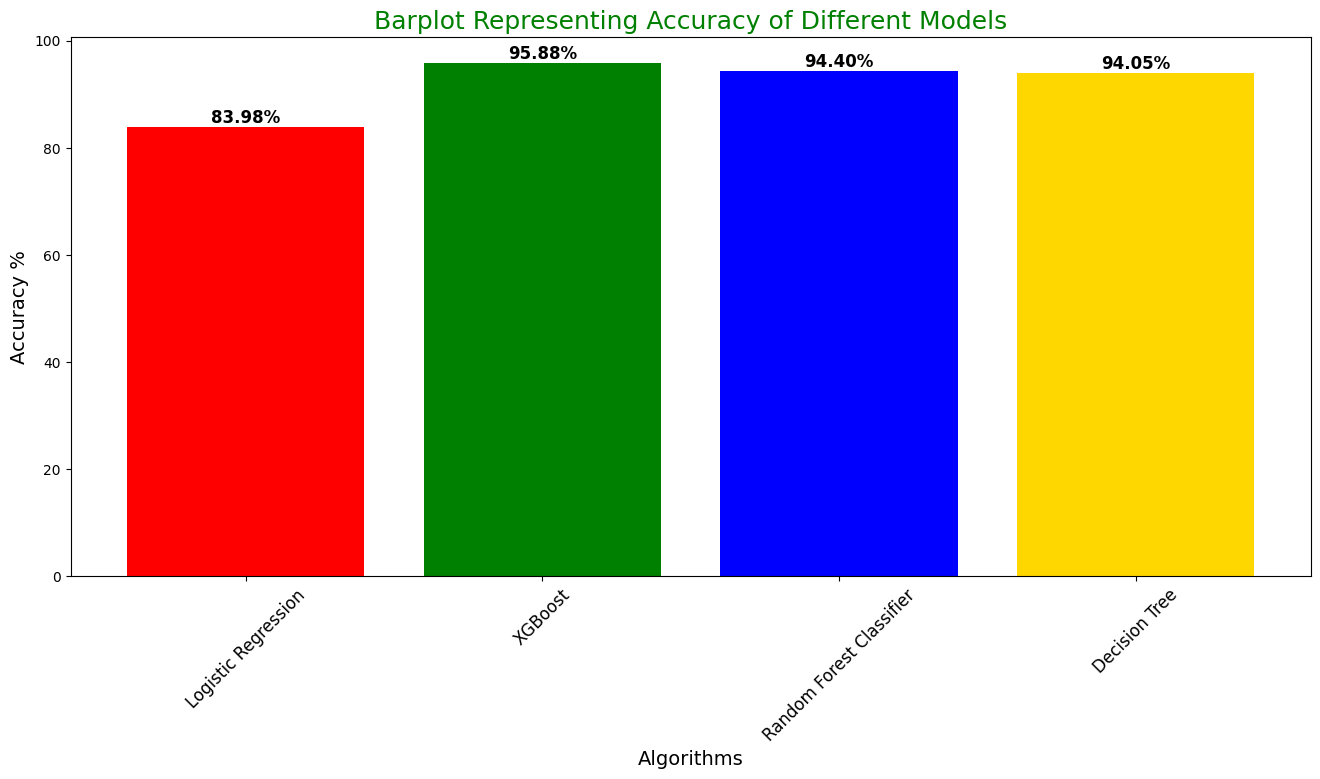

In [298]:
colors = ['red', 'green', 'blue', 'gold']

plt.figure(figsize=(16, 7))
plt.title("Barplot Representing Accuracy of Different Models",fontsize=18,color="green")
plt.xlabel("Algorithms",fontsize=14)
plt.ylabel("Accuracy %",fontsize=14)
plt.xticks(rotation=45,fontsize=12)  # Rotating for better visibility

# Creating the bar plot
bars = plt.bar(model_ev['Model'], model_ev['Accuracy'], color=colors)

# Adding labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,  # X-coordinate (center of the bar)
             bar.get_height(),                 # Y-coordinate (top of the bar)
             f"{bar.get_height():.2f}%",       # Text (formatted accuracy)
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()
